### Neuroscience Data Analysis wiht Python Workshop – MiniProject #1
Due till 20/12/25
Q1 (50pts): Analyzing Neural Spike Patterns
Background
Neurons communicate by producing brief electrical signals called action
potentials or spikes. Different types of neurons display characteristic spiking patterns
that can be identified by analyzing the timing of their spikes.
In this exercise, you'll work with three different types of neurons:
1. Regular firing neuron (no noise): Fires at perfectly regular intervals, spikes at
exactly 10 ms, 20 ms, 30 ms.
2. Regular firing neuron with noise: Fires at approximately regular intervals, but with
some biological variability. The intervals between spikes vary slightly due to random
fluctuations (noise).
3. Bursting neuron: Fires in bursts – clusters of rapid spikes separated by longer
silent periods. Within each burst, spikes occur very quickly (short intervals), the bursts
themselves are separated by much longer intervals.
You have been given spike time data from three neurons recorded over a 5-second
period. Your task is to analyze their firing patterns and understand what distinguishes
each type.

### The Data

Create three arrays containing spike times for three neurons:
· Neuron A: Regular neuron with no noise
· Neuron B: Regular neuron with Gaussian noise
· Neuron C: Bursting neuron
Each array contains the times (in milliseconds) when that neuron fired a spike,
measured from time = 0.
The data should look like this:

neuron_a_spikes = [10, 20, 30, 40, 50, ...] # Regular, no noise

neuron_b_spikes = [9.8, 20.3, 29.7, 40.2, ...] # Regular with noise

neuron_c_spikes = [1, 2, 3, 51, 52, 53, 101, ...] # Bursting

In [2]:
import numpy as np

# Parameters for Data Generation
RECORDING_DURATION_MS = 5000  # 5 seconds
REGULAR_INTERVAL_MS = 10     # The base firing interval for regular neurons

# 1. Neuron A: Regular Firing Neuron (No Noise):
# Fires at perfectly regular intervals (e.g., 10, 20, 30, ...)
# Method: Using arange() to create a sequence starting at the first spike, 
# up to the duration, with steps of the interval.

# Note to myself: The range function generates numbers starting from 10, up to (but not including) 
# 5000 + 10, stepping by 10.
neuron_a_spikes = np.arange(REGULAR_INTERVAL_MS, 
                           RECORDING_DURATION_MS + REGULAR_INTERVAL_MS, 
                           REGULAR_INTERVAL_MS)

print("Neuron A (Regular, No Noise)")
print(f"Total Spikes: {len(neuron_a_spikes)}")
print(f"First 10 Spikes: {neuron_a_spikes[:10]}")



# 2. Neuron B: Regular Firing Neuron with Gaussian Noise
# Fires at approximately regular intervals (10, 20, 30, ...) 
# but with small random fluctuations (noise).
# Method: Starting with the perfect intervals (like Neuron A) and adding small Gaussian noise 
# to each spike time.

# Standard deviation for the Gaussian noise (e.g., 0.5 ms of jitter)
NOISE_STD_DEV_MS = 0.5 

# 1. Start with the regular spike times (same as Neuron A)
perfect_spikes = np.arange(REGULAR_INTERVAL_MS, 
                          RECORDING_DURATION_MS + REGULAR_INTERVAL_MS, 
                          REGULAR_INTERVAL_MS)

# 2. Generate random Gaussian noise for each spike time
noise = np.random.normal(loc=0.0, scale=NOISE_STD_DEV_MS, size=len(perfect_spikes))

# 3. Add the noise to the perfect spike times
neuron_b_spikes = perfect_spikes + noise

# Ensure no spike times are negative (though unlikely with these parameters)
neuron_b_spikes = np.clip(neuron_b_spikes, a_min=0, a_max=None) 

print("Neuron B (Regular with Noise)")
print(f"Total Spikes: {len(neuron_b_spikes)}")
print(f"First 10 Spikes: {neuron_b_spikes[:10].round(2)}")


# 3. Neuron C: Bursting Neuron
# Description: Fires in clusters (bursts) of rapid spikes separated by long silent periods.
# Method: Defining parameters for spikes *within* a burst and intervals *between* bursts, 
# then looping to assemble the full sequence.

BURST_SPACING_MS = 100       # Interval between the START of bursts (e.g., 100 ms)
SPIKES_PER_BURST = 3        # Number of spikes in one burst
INTRA_BURST_INTERVAL_MS = 2  # Very short interval *within* a burst (e.g., 2 ms)

neuron_c_spikes = []
current_time = BURST_SPACING_MS  # Starting the first burst at 100 ms

while current_time < RECORDING_DURATION_MS:
    # 1. Firing the spikes *within* a single burst
    for i in range(SPIKES_PER_BURST):
        spike_time = current_time + (i * INTRA_BURST_INTERVAL_MS)
        neuron_c_spikes.append(spike_time)
    
    # 2. Advancing to the start of the next burst
    # The next burst starts at a time defined by the BURST_SPACING_MS
    current_time += BURST_SPACING_MS

# Converting to a NumPy array
neuron_c_spikes = np.array(neuron_c_spikes)

# Cleaning up any spikes that went slightly over the duration
neuron_c_spikes = neuron_c_spikes[neuron_c_spikes <= RECORDING_DURATION_MS]

print("Neuron C (Bursting)")
print(f"Total Spikes: {len(neuron_c_spikes)}")
print(f"First 10 Spikes: {neuron_c_spikes[:10].round(2)}")

Neuron A (Regular, No Noise)
Total Spikes: 500
First 10 Spikes: [ 10  20  30  40  50  60  70  80  90 100]
Neuron B (Regular with Noise)
Total Spikes: 500
First 10 Spikes: [  9.78  20.17  29.92  40.18  50.    59.39  69.83  80.45  90.03 100.49]
Neuron C (Bursting)
Total Spikes: 147
First 10 Spikes: [100 102 104 200 202 204 300 302 304 400]


### Part A: Visualize Spike Trains (Raster Plots)
Create a raster plot for each neuron showing when spikes occurred.
Instructions:

1. Divide the 5-second recording period into time bins of 1 ms each (so you'll have
5000 bins total).
2. For each neuron, mark which bins contain a spike.
3. Create a visualization where:
o The x-axis represents time (in milliseconds)
o For each neuron, plot a vertical line or marker whenever a spike occurred
o Display all three neurons on the same figure (in separate rows or different colors) so
you can compare their patterns
Tip: You can use plt.eventplot() or plt.scatter() to create raster plots in matplotlib.
Questions: What did you see? Did the results match your expectations?

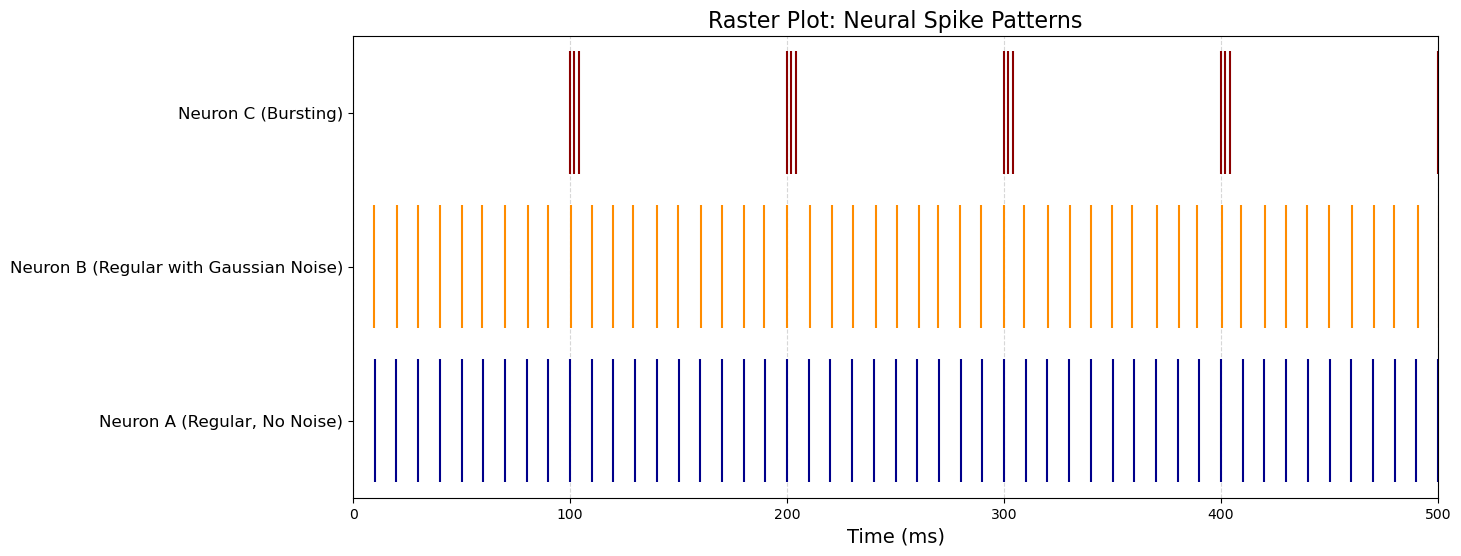

In [38]:
import matplotlib.pyplot as plt

# Defining the Neuron Data
# Combining the data and labels for easy plotting
spike_data = [neuron_a_spikes, neuron_b_spikes, neuron_c_spikes]
neuron_labels = ["Neuron A (Regular, No Noise)", 
                 "Neuron B (Regular with Gaussian Noise)", 
                 "Neuron C (Bursting)"]
# The total duration is 5000 ms (5 seconds)
RECORDING_DURATION_MS = 5000 

# Creating the Raster Plot
plt.figure(figsize=(14, 6)) # Chose to use a wider figure to show time resolution

# Using eventplot to plot the spikes for all three neurons
# Note to myself: The positions argument defines the y-axis position for each spike train
# (I will use 1, 2, and 3 for the three rows)
plt.eventplot(spike_data, 
              colors=['darkblue', 'darkorange', 'darkred'],
              lineoffsets=[1, 2, 3], # Y-position for each neuron
              linelengths=0.8)       # Length of the vertical spike line

# Customizing the Plot
plt.title('Raster Plot: Neural Spike Patterns', fontsize=16)
plt.xlabel('Time (ms)', fontsize=14)
plt.yticks([1, 2, 3], neuron_labels, fontsize=12) # Labeling the y-axis rows
plt.ylim(0.5, 3.5) # Setting y-limits to center the lines

# Adjusting x-axis to show only the first 500 ms for better detail, 
# as the full 5000 ms makes individual spikes hard to see.
plt.xlim(0, 500) 
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()

### Questions: What did you see? Did the results match your expectations?

**Answer:** The results match the expectations for all three neuron types!

**Neuron A (Regular, No Noise):** Bottom row observation: the spikes appear as a train of perfectly periodic, evenly spaced vertical lines. When measured against the x-axis, they occur exactly every $10 \text{ ms}$ (e.g., $10 \text{ ms}, 20 \text{ ms}, 30 \text{ ms}, \dots$). This represents a regular firing neuron with no noise, where the inter-spike interval (ISI) is constant and deterministic.

**Neuron B (Regular with Gaussian Noise):** Middle Row observation: The spikes are still visually periodic, maintaining the overall rhythm established by the $10 \text{ ms}$ average interval. However, the exact timing of the spikes is slightly jittered due to added Gaussian noise. The vertical lines are not perfectly aligned with the regular grid lines or with the spikes from Neuron A as expected

**Neuron C (Bursting):** Top row observation: The spike train is visually broken into distinct, isolated clusters or bursts. We can see **a) Within a burst:** The vertical lines are grouped very closely together (separated by only $2 \text{ ms}$). **b) Between bursts:** A long period of silence separates each cluster (the space between the groups of three is $\approx 96 \text{ ms}$). For example, a burst occurs around $100 \text{ ms}$, then silence, and the next burst starts around $200 \text{ ms}$.

### Part B: Analyze Inter-Spike Intervals (ISI)
The inter-spike interval (ISI) is the time between consecutive spikes. Analyzing ISI distributions is a standard method to characterize neuronal firing patterns.

**Instructions:**
1. For each neuron, calculate the ISI: ISI = difference between consecutive spike times
2. Create histograms of the ISI distributions for all three neurons.
- Use appropriate bin sizes (try 0.5 ms or 1 ms bins)
- Label your axes clearly (x-axis: "Inter-spike interval (ms)", y-axis: "Count" or
"Frequency")
- Display all three histograms (either as subplots or overlaid with different colors)

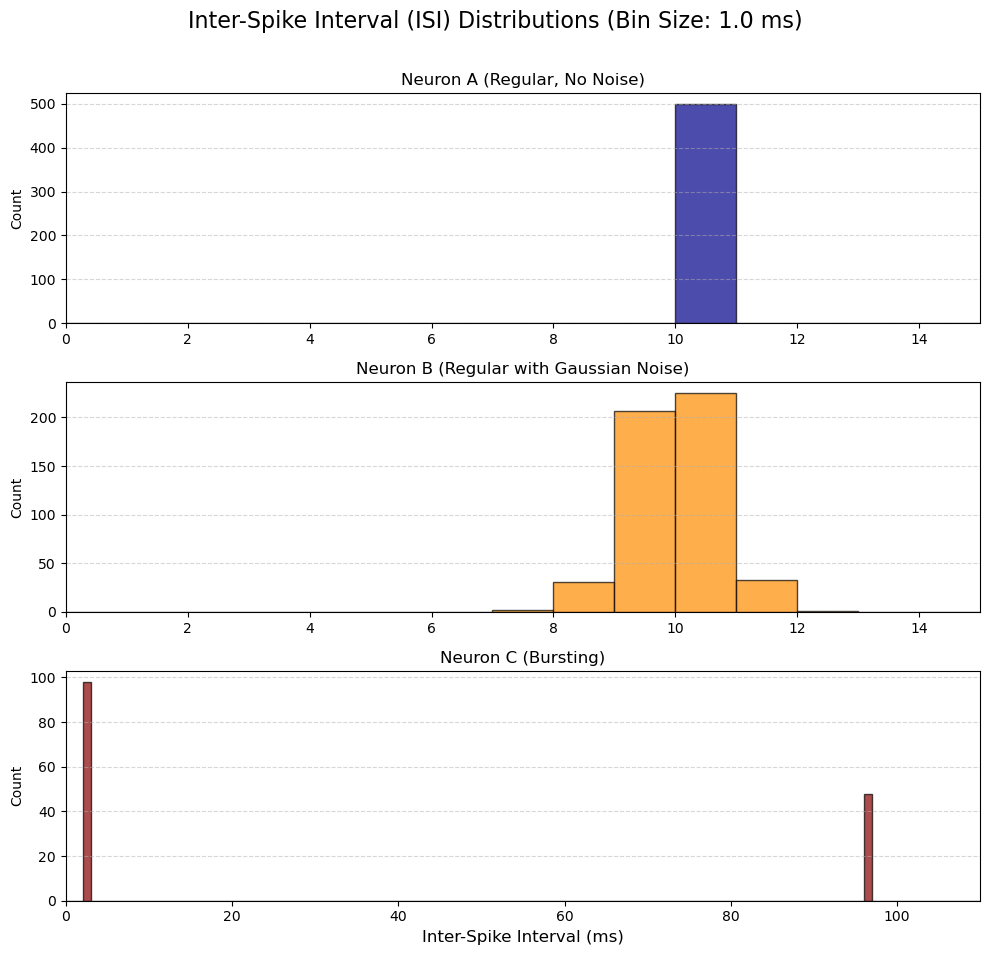

In [39]:
# Defining Parameters
BIN_SIZE_MS = 1.0  # Bin size for the histograms (e.g., 0.5 ms or 1.0 ms)

# 1. Calculating Inter-Spike Intervals (ISI)

# Note to myself: ISI is the difference between spike times[i+1] and spike times[i].
# I will be using np.diff() for this.

isi_a = np.diff(neuron_a_spikes)
isi_b = np.diff(neuron_b_spikes)
isi_c = np.diff(neuron_c_spikes)

isi_data = [isi_a, isi_b, isi_c]
neuron_labels = ["Neuron A (Regular, No Noise)", 
                 "Neuron B (Regular with Gaussian Noise)", 
                 "Neuron C (Bursting)"]
colors = ['darkblue', 'darkorange', 'darkred']

# 2. Determining Bin Edges
# I will set the same max limit for Neurons A and B to compare them easily.
# Neuron C will need a much wider range to show the long inter-burst interval.

# Max ISI for Regular neurons is around 10 ms (plus noise)
max_isi_ab = 15.0 
bins_ab = np.arange(0, max_isi_ab + BIN_SIZE_MS, BIN_SIZE_MS)

# Max ISI for Bursting neuron is around 100 ms
max_isi_c = 110.0
bins_c = np.arange(0, max_isi_c + BIN_SIZE_MS, BIN_SIZE_MS)


# 3. Creating ISI Histograms (Subplots)

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10), sharex=False)
fig.suptitle(f'Inter-Spike Interval (ISI) Distributions (Bin Size: {BIN_SIZE_MS} ms)', fontsize=16)

# Neuron A & B (Focus on the 10 ms interval)
for i, ax in enumerate(axes[:2]):
    ax.hist(isi_data[i], bins=bins_ab, color=colors[i], edgecolor='black', alpha=0.7)
    ax.set_title(neuron_labels[i], fontsize=12)
    ax.set_xlim(0, max_isi_ab)
    ax.set_ylabel('Count', fontsize=10)
    ax.grid(axis='y', alpha=0.5, linestyle='--')
    
# Neuron C (Needs a wider x-axis)
ax_c = axes[2]
ax_c.hist(isi_data[2], bins=bins_c, color=colors[2], edgecolor='black', alpha=0.7)
ax_c.set_title(neuron_labels[2], fontsize=12)
ax_c.set_xlim(0, max_isi_c)
ax_c.set_ylabel('Count', fontsize=10)
ax_c.set_xlabel('Inter-Spike Interval (ms)', fontsize=12)
ax_c.grid(axis='y', alpha=0.5, linestyle='--')

# Adjusting layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

### 1. What does the ISI histogram look like for a perfectly regular neuron?
The ISI histogram for a perfectly regular neuron (like Neuron A) looks like a single, extremely sharp, narrow peak located exactly at the constant firing interval. The histogram shows almost all counts (499 out of 500) concentrated in a single bin (the $10 \text{ ms}$ bin). This demonstrates that the Inter-Spike Interval (ISI) is a single, fixed value ($10 \text{ ms}$), with a standard deviation of zero. There is no variability in the timing between consecutive spikes.

### 2. How does noise affect the ISI distribution?
Noise, specifically Gaussian noise, transforms the ISI histogram from a single sharp peak into a wider, bell-shaped distribution centered around the average firing interval. The core of the distribution is still centered around the $10 \text{ ms}$ mark, but the spikes are now spread across several bins (from approximately $8 \text{ ms}$ to $12 \text{ ms}$). The introduction of noise increases the variability (or standard deviation) of the ISI. While the average firing interval remains $10 \text{ ms}$, each individual interval is randomly displaced slightly, leading to the characteristic Gaussian (bell-curve) spread in the histogram. The wider the peak, the greater the noise/variability.

### 3. What distinguishes a bursting neuron's ISI histogram from a regular neuron's?
The most defining feature distinguishing a bursting neuron's ISI histogram from a regular neuron's is its bimodal (two-peaked) distribution. The histogram shows two distinct and well-separated peaks: A large, short-latency peak (at $2 \text{ ms}$). A smaller, long-latency peak (around $98-100 \text{ ms}$). The short-latency peak represents the intra-burst intervals (spikes that occur very quickly within the same burst). The long-latency peak represents the inter-burst intervals (the long, silent periods between bursts).

### Part C: Generate and Classify Your Own Neuron

**Instructions:**
1. Simulate a regular neuron with Gaussian noise (similar to Neuron B):
- Start at time 0
- Generate spike times where the interval between spikes is drawn from a normal distribution with: 1) Mean = 10 ms 2) Standard deviation = 1-2 ms (your choice)
- Continue generating spikes until you reach 5 seconds (5000 ms)
Hint: Use np.random.normal() to generate intervals, then use np.cumsum() to convert intervals to spike times
2. Plot the ISI histogram of your simulated neuron

Neuron D (Your Simulated Regular Noisy Neuron)
Mean ISI: 9.91 ms
Calculated Std Dev: 1.45 ms
Total Spikes: 504


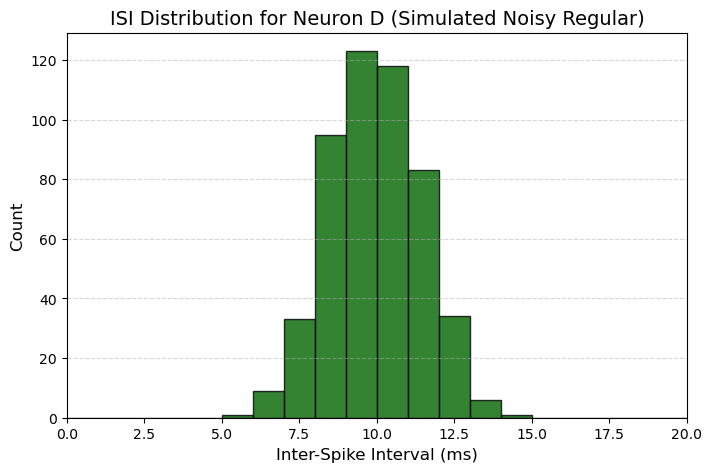

In [40]:
# 1. Simulating Neuron D: Regular Neuron with Gaussian Noise

# Parameters for Neuron D (My choice for variability)
MEAN_INTERVAL_MS = 10.0   # Mean ISI
STD_DEV_MS = 1.5          # Standard Deviation of the ISI (chosen between 1-2 ms)
RECORDING_DURATION_MS = 5000 

# A. Generating Inter-Spike Intervals (ISIs)

# I need to estimate how many spikes will occur (approx 5000/10 = 500). 
# I'll generate a few extra to be safe and stop once the cumulative sum exceeds 5000 ms.
ESTIMATED_SPIKES = int(RECORDING_DURATION_MS / MEAN_INTERVAL_MS * 1.2) # Generating 20% extra

# Generating ISIs drawn from the normal distribution
# Ensuring intervals are positive (biological constraint)
raw_isi_d = np.random.normal(loc=MEAN_INTERVAL_MS, 
                             scale=STD_DEV_MS, 
                             size=ESTIMATED_SPIKES)

# Clipping any negative intervals to a very small positive number (e.g., 0.1 ms)
# A neuron cannot have a negative time interval between spikes.
raw_isi_d = np.clip(raw_isi_d, a_min=0.1, a_max=None)


# B. Converting ISIs to Absolute Spike Times:
# Note to myself: np.cumsum() will convert the array of intervals (ISIs) into the array of 
# absolute spike times, starting from time = 0.
neuron_d_spikes = np.cumsum(raw_isi_d)

# C. Clipping to Recording Duration:
# Stopping to generate spikes once the cumulative time exceeds 5000 ms
neuron_d_spikes = neuron_d_spikes[neuron_d_spikes <= RECORDING_DURATION_MS]

# Calculating the ISI for the final plot
isi_d = np.diff(neuron_d_spikes)

print("Neuron D (Your Simulated Regular Noisy Neuron)")
print(f"Mean ISI: {np.mean(isi_d):.2f} ms")
print(f"Calculated Std Dev: {np.std(isi_d):.2f} ms")
print(f"Total Spikes: {len(neuron_d_spikes)}")


# 2. Plotting the ISI Histogram of my simulated Neuron (D)

BIN_SIZE_MS = 1.0  
MAX_ISI_D = 20.0 # Wide enough to see the Gaussian spread
bins_d = np.arange(0, MAX_ISI_D + BIN_SIZE_MS, BIN_SIZE_MS)

plt.figure(figsize=(8, 5))
plt.hist(isi_d, bins=bins_d, color='darkgreen', edgecolor='black', alpha=0.8)

plt.title(f'ISI Distribution for Neuron D (Simulated Noisy Regular)', fontsize=14)
plt.xlabel('Inter-Spike Interval (ms)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xlim(0, MAX_ISI_D)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

### 3. Compare your simulated neuron's ISI histogram to the three neurons you analyzed in Part B? Which neuron type (A, B, or C) does your synthetic neuron most closely resemble?
My synthetic Neuron D most closely resembles Neuron B (Regular with Gaussian Noise). Both histograms exhibit a single, approximately Gaussian (bell-shaped) peak centered around $10 \text{ ms}$.
### What features of the ISI histogram led you to this conclusion?
The resemblance is due to two primary features of Neuron D's ISI histogram: **1) Single Peak:** Like Neuron B, Neuron D has only one prominent peak (at $10 \text{ ms}$), immediately ruling out Neuron C (which is bimodal). **2) Width of Peak:** The peak has a measurable width (spread), confirming the presence of noise, which rules out Neuron A (which is a single, sharp bar). The single, noisy peak is the signature of a regular-firing neuron with biological variability.

### How does changing the standard deviation parameter affect the ISI distribution?
Changing the standard deviation ($\sigma$) directly affects the width (or spread) of the ISI distribution, which is a measure of the neuron's variability/noise.
- **A low $\sigma$:** (like the estimated $0.5 \text{ ms}$ for Neuron B) results in a narrower, taller peak, indicating low timing variability.
- **A high $\sigma$:** (like my choice of $1.5 \text{ ms}$ for Neuron D) results in a wider, flatter peak, indicating higher timing variability and less precise firing.

The mean of the distribution, however, remains fixed at the input mean ($10 \text{ ms}$), representing the underlying firing rate.

### Q2 (50pts): For this question you will use the dataset titled “laptop-price – dataset.csv”.

Import the libraries mentioned above and import the dataset from your filesystem into
the code.

In [14]:
# Defining the full path to the file
file_path = "/Users/Helen/Desktop/Israel_documents/Lecture_material/Advanced_Python/Python_advanced_projects/empy_python_package/Projects_Python/laptop_price - dataset.csv"


# Using pandas to read the CSV file into a DataFrame
df = pd.read_csv(file_path)
    
print("\n First 5 rows of the DataFrame (df.head()):")
print(df.head())

# The DataFrame is now stored in the variable 'df'


 First 5 rows of the DataFrame (df.head()):
  Company      Product   TypeName  Inches                    ScreenResolution  \
0   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Macbook Air  Ultrabook    13.3                            1440x900   
2      HP       250 G6   Notebook    15.6                   Full HD 1920x1080   
3   Apple  MacBook Pro  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  MacBook Pro  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

  CPU_Company       CPU_Type  CPU_Frequency (GHz)  RAM (GB)  \
0       Intel        Core i5                  2.3         8   
1       Intel        Core i5                  1.8         8   
2       Intel  Core i5 7200U                  2.5         8   
3       Intel        Core i7                  2.7        16   
4       Intel        Core i5                  3.1         8   

                Memory GPU_Company                GPU_Type  OpSys  \
0            128GB S

### Please write code to complete the following tasks with this dataset:
- **Plot the price of all the laptops**

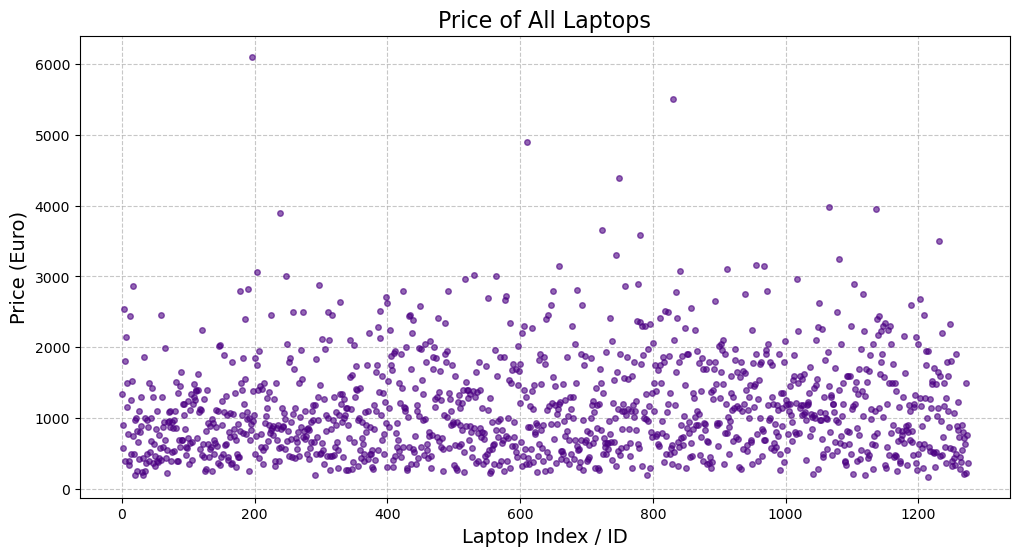

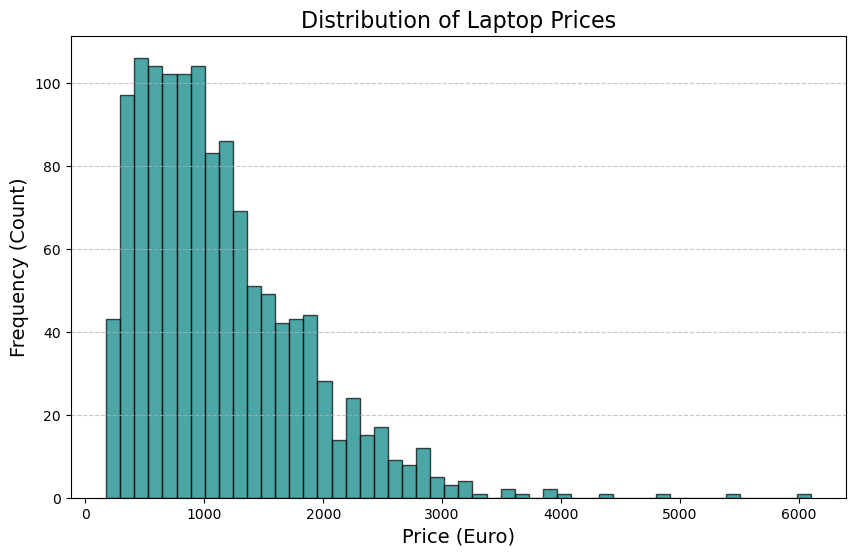

In [41]:
# 1. Scatter Plot of Individual Prices:
# Showing the price of every single laptop in the dataset.
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Price (Euro)'], 
         marker='o', 
         linestyle='',
         alpha=0.6, 
         markersize=4, 
         color='indigo')

plt.title('Price of All Laptops', fontsize=16)
plt.xlabel('Laptop Index / ID', fontsize=14)
plt.ylabel('Price (Euro)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show() # The figure has been saved as 'laptop_price_scatter_plot.png'

# 2. Histogram of Price Distribution (Additional Insight)
# Showing how frequently different price ranges occur.
plt.figure(figsize=(10, 6))
plt.hist(df['Price (Euro)'], bins=50, edgecolor='black', color='teal', alpha=0.7)
plt.title('Distribution of Laptop Prices', fontsize=16)
plt.xlabel('Price (Euro)', fontsize=14)
plt.ylabel('Frequency (Count)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # The figure has been saved as 'laptop_price_histogram.png'

### Which company has on average the most expensive laptop? What is the average laptop price for each company?

In [24]:
import pandas as pd

!pip install tabulate

# Calculating the average price for each company
average_price_by_company = df.groupby('Company')['Price (Euro)'].mean().reset_index()

# Renaming the column for clarity and formatting the price to 2 decimal places
average_price_by_company.rename(columns={'Price (Euro)': 'Average Price (Euro)'}, inplace=True)
average_price_by_company['Average Price (Euro)'] = average_price_by_company['Average Price (Euro)'].round(2)

# Sorting the results in descending order of average price
most_expensive_company = average_price_by_company.sort_values(by='Average Price (Euro)', ascending=False)

# Getting the name of the company with the highest average price
highest_avg_price_company = most_expensive_company.iloc[0]['Company']
highest_avg_price = most_expensive_company.iloc[0]['Average Price (Euro)']

# Displaying the results
print(most_expensive_company.to_markdown(index=False, numalign="left", stralign="left"))

# Printing the company with the highest average price
print(f"\nCompany with the highest average laptop price: {highest_avg_price_company} (Average Price: {highest_avg_price:.2f} Euro)")

| Company   | Average Price (Euro)   |
|:----------|:-----------------------|
| Razer     | 3346.14                |
| LG        | 2099                   |
| MSI       | 1728.91                |
| Google    | 1677.67                |
| Microsoft | 1612.31                |
| Apple     | 1564.2                 |
| Huawei    | 1424                   |
| Samsung   | 1413.44                |
| Toshiba   | 1267.81                |
| Dell      | 1199.23                |
| Xiaomi    | 1133.46                |
| Asus      | 1123.83                |
| Lenovo    | 1093.86                |
| HP        | 1080.31                |
| Fujitsu   | 729                    |
| Acer      | 633.46                 |
| Chuwi     | 314.3                  |
| Mediacom  | 295                    |
| Vero      | 217.42                 |

Company with the highest average laptop price: Razer (Average Price: 3346.14 Euro)


### Find the different types of Operating systems present in the data - under the column name "OpSys".
- Please note - there are operating systems that are the same systems and just written differently in the column - please fix them to be uniform.

In [25]:
# Identifying and printing original unique OS names
original_oss = df['OpSys'].unique()
print("Original Unique Operating Systems:")
print(original_oss)

# 2. Standardizing the operating system names
# Using .replace() to e.g. consolidate 'Mac OS X' into 'macOS'
df['OpSys'] = df['OpSys'].replace('Mac OS X', 'macOS')

# 3. Getting and printing the new set of unique operating system names to confirm the change
standardized_unique_oss = df['OpSys'].unique()
print("\nStandardized Unique Operating Systems:")
print(standardized_unique_oss)

Original Unique Operating Systems:
['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']

Standardized Unique Operating Systems:
['macOS' 'No OS' 'Windows 10' 'Linux' 'Android' 'Windows 10 S' 'Chrome OS'
 'Windows 7']


### Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.

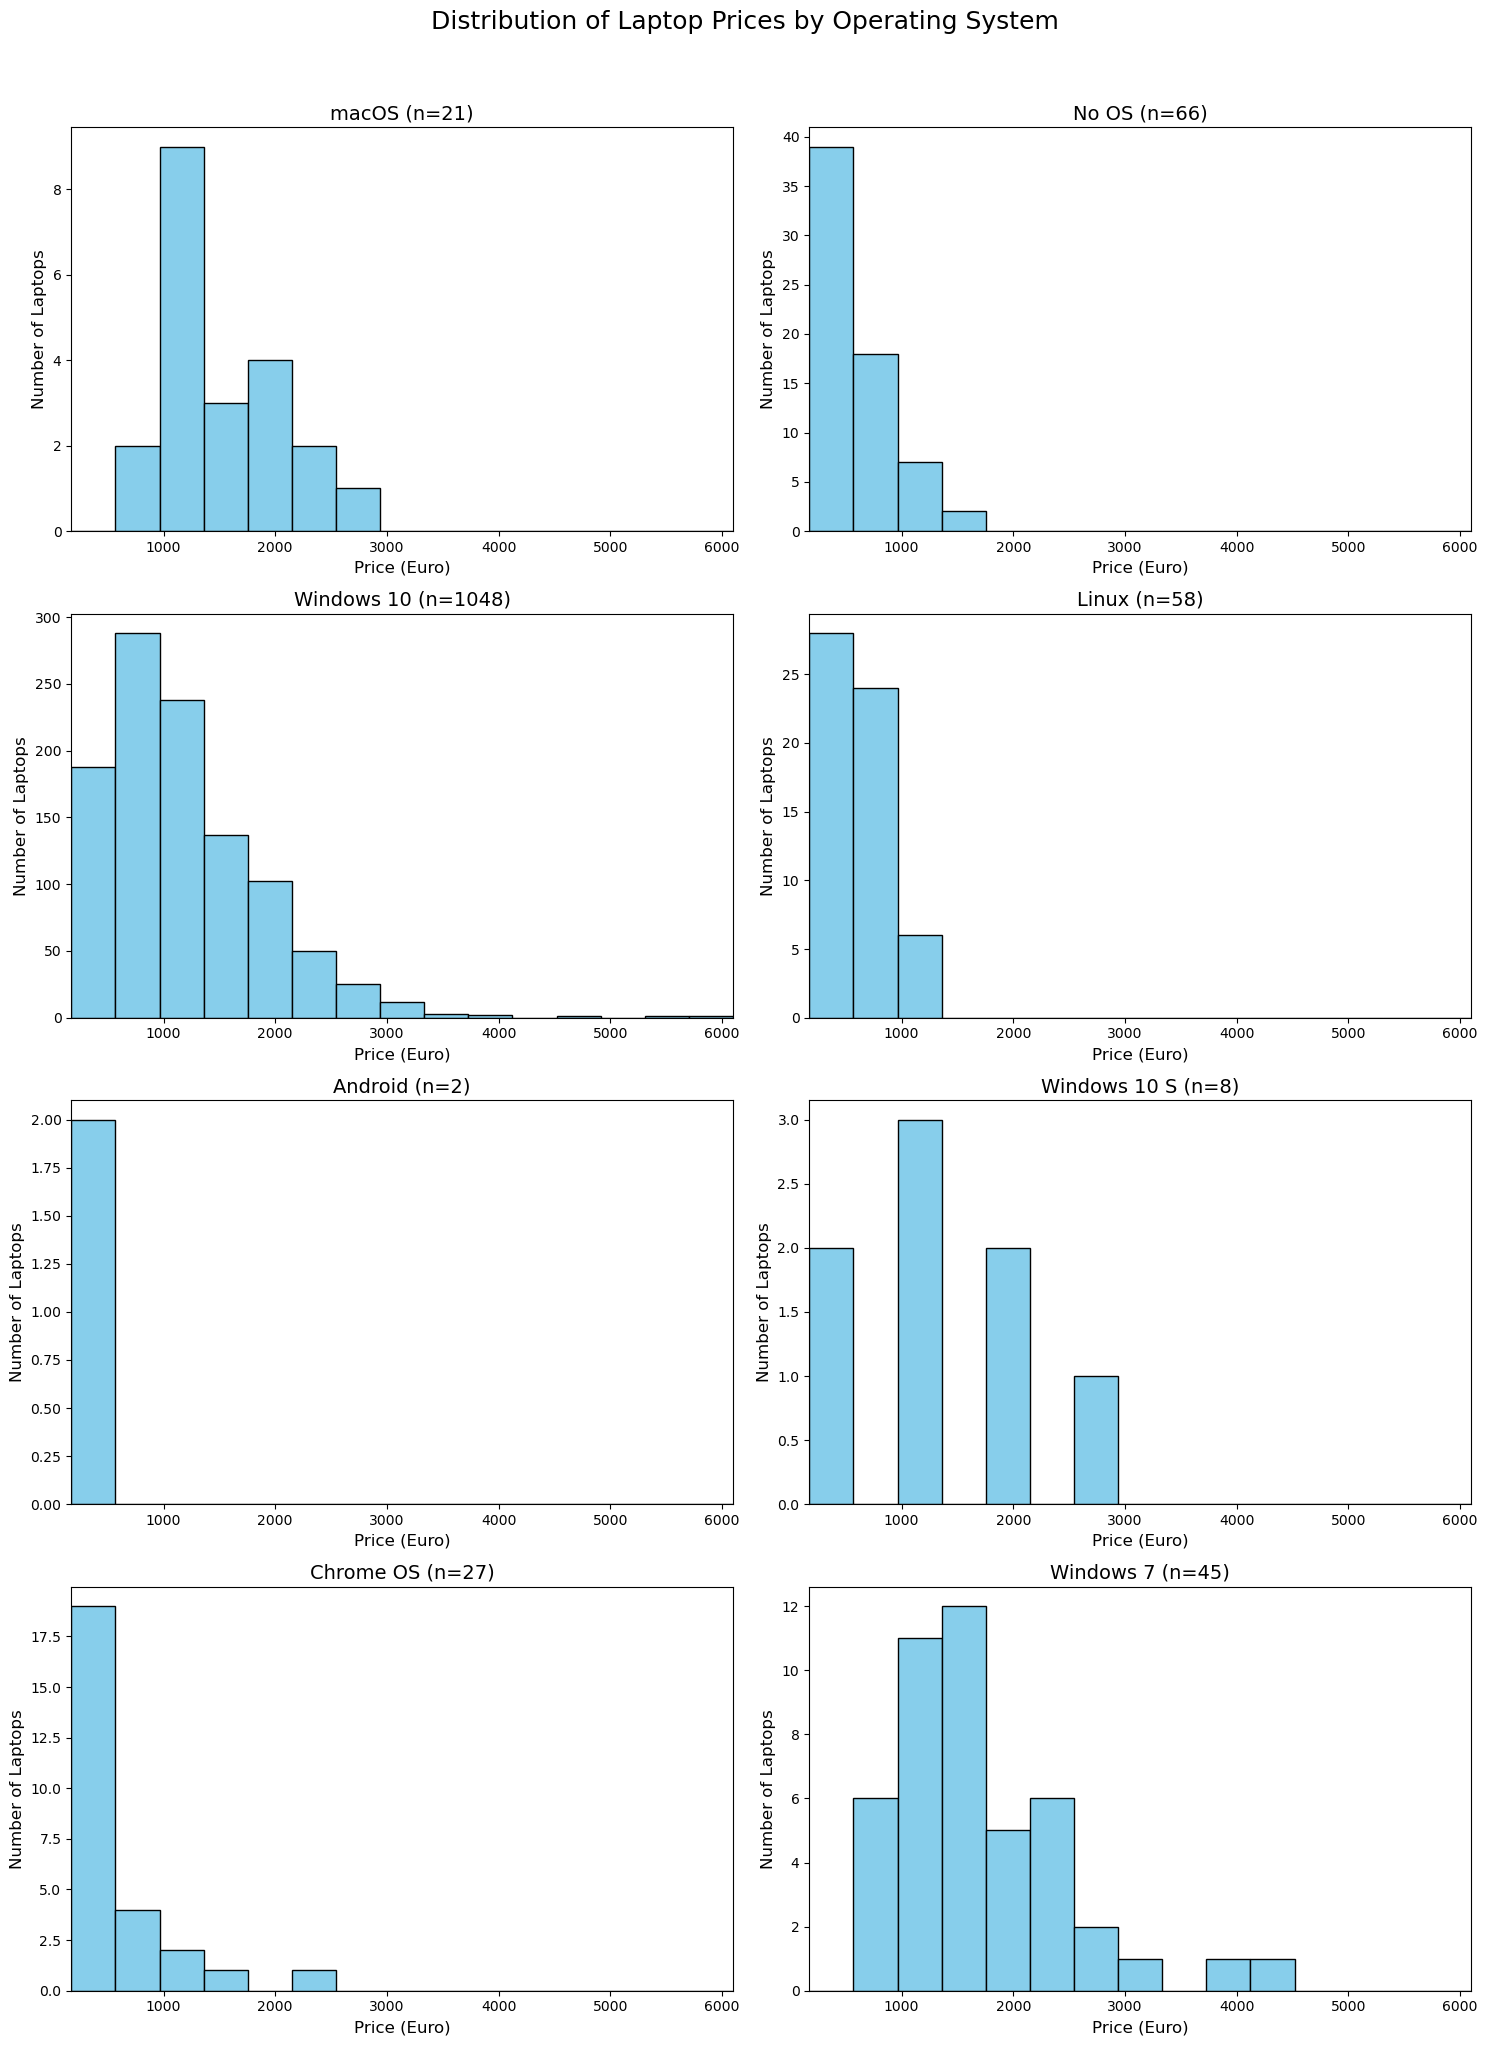

In [30]:
# Continued: Start of Plotting Code

# The standardized list of OS types for plotting is: standardized_unique_oss
# Calculating overall price range for consistent histogram bins
min_price = df['Price (Euro)'].min()
max_price = df['Price (Euro)'].max()
price_range = (min_price, max_price)
num_bins = 15

# Setting up the subplot figure (4 rows, 2 columns for the 8 OS types)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten() # Flatten array for easy iteration

fig.suptitle('Distribution of Laptop Prices by Operating System', fontsize=18, y=1.02)

for i, os in enumerate(standardized_unique_oss):
    # Filtering data for the current OS
    os_data = df[df['OpSys'] == os]

    # Plotting histogram
    ax = axes[i]
    ax.hist(os_data['Price (Euro)'], bins=num_bins, range=price_range, edgecolor='black', color='skyblue')

    # Setting title and labels
    ax.set_title(f'{os} (n={len(os_data)})', fontsize=14)
    ax.set_xlabel('Price (Euro)', fontsize=12)
    ax.set_ylabel('Number of Laptops', fontsize=12)

    # Using the same x-limits for easy comparison
    ax.set_xlim(price_range)

# Hiding any unused subplots (if necessary)
for j in range(len(standardized_unique_oss), len(axes)):
    fig.delaxes(axes[j])

# Adjusting layout to prevent title and label overlap
plt.tight_layout()

# Saving the figure
plt.savefig("price_distribution_by_os_histogram_final.png")

### Plot for each of the operating system types the distribution of the prices, so that the number of plots equals to the number of unique operating systems.
- What is the relationship between RAM and computer price? add an adequate plot to support your findings. <<< check data for outliers, what would be considered as an outlier? How will you detect it would you? >>>

 Outlier Detection for Price (Euro)
Q1 (25th percentile): 609.00 Euro
Q3 (75th percentile): 1496.50 Euro
IQR: 887.50 Euro
Upper Bound (Q3 + 1.5*IQR): 2827.75 Euro
Number of outliers detected: 28

 Relationship Analysis:
Pearson Correlation (r) between RAM (GB) and Price (Euro): 0.7403


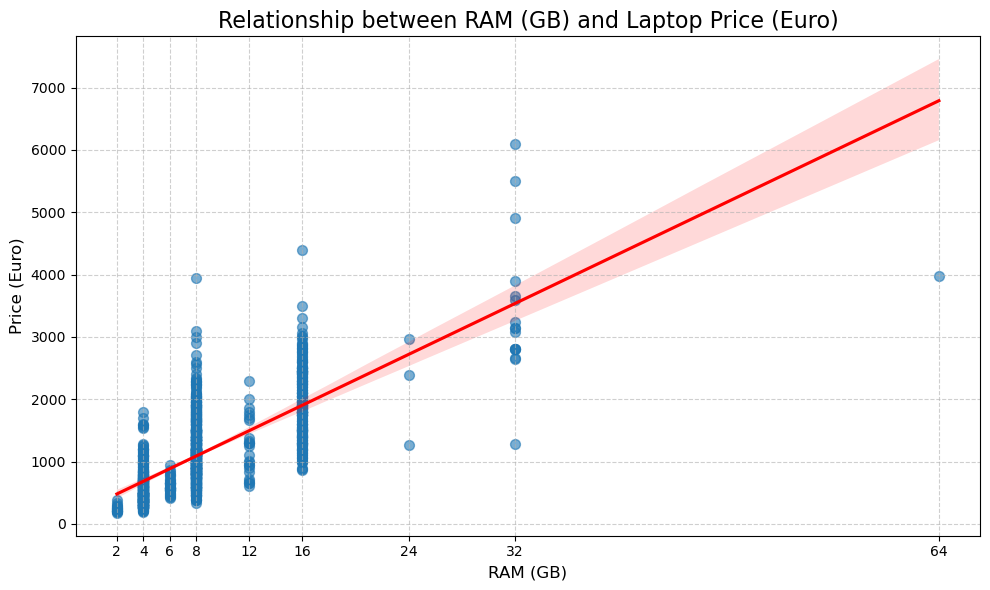

In [34]:
import seaborn as sns

# 1. Outlier Detection in Price (Euro) using IQR method
price = df['Price (Euro)']
Q1 = price.quantile(0.25)
Q3 = price.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detecting outliers
outliers = df[(price < lower_bound) | (price > upper_bound)]
num_outliers = len(outliers)

# Calculating Pearson correlation coefficient between RAM and Price
correlation = df['RAM (GB)'].corr(df['Price (Euro)'])

print(f" Outlier Detection for Price (Euro):")
print(f"Q1 (25th percentile): {Q1:.2f} Euro")
print(f"Q3 (75th percentile): {Q3:.2f} Euro")
print(f"IQR: {IQR:.2f} Euro")
print(f"Upper Bound (Q3 + 1.5*IQR): {upper_bound:.2f} Euro")
print(f"Number of outliers detected: {num_outliers}")

print(f"\n Relationship Analysis:")
print(f"Pearson Correlation (r) between RAM (GB) and Price (Euro): {correlation:.4f}")

# 2. Plotting the relationship (Scatter Plot with Regression Line)

plt.figure(figsize=(10, 6))

# Creating the scatter plot with regression line
sns.regplot(x='RAM (GB)', y='Price (Euro)', data=df,
            scatter_kws={'alpha': 0.6, 's': 50}, # Scatter plot appearance
            line_kws={'color': 'red'}) # Regression line color

plt.title('Relationship between RAM (GB) and Laptop Price (Euro)', fontsize=16)
plt.xlabel('RAM (GB)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Ensuring x-axis ticks are set only for the discrete RAM values
ram_values = sorted(df['RAM (GB)'].unique())
plt.xticks(ram_values)

plt.tight_layout()
plt.savefig("ram_vs_price_scatter_plot.png")

### Create a new column for the dataframe called "Storage type" that extracts the storage type from the column "Memory".
- For example, in the first row in the column "Memory" it states "128GB SSD", the new column will have just "SSD" in its first row.

In [37]:
import re

# Defining a regex pattern to capture the common storage types
# Note to myself: The order is important: placing multi-word types like 'Flash Storage' first.
storage_pattern = r'(Flash Storage|SSD|HDD|Hybrid|eMMC)'

# Creating the new column "Storage type"
# 1. Using str.findall() to find all storage types in the 'Memory' column.
# 2. Using .apply(lambda x: ', '.join(x)) to join the list of found types into a single string.
df['Storage type'] = df['Memory'].str.findall(storage_pattern, flags=re.IGNORECASE).apply(lambda x: ', '.join(x))

# The regex is case-insensitive, so I will convert the final output to uppercase
# to ensure consistency (e.g., 'ssd' becomes 'SSD').
df['Storage type'] = df['Storage type'].str.upper()

# Displaying a sample and unique types for verification
print("Sample of Data Transformation: ")
print(df[['Memory', 'Storage type']].head(10).to_markdown(index=False, numalign="left", stralign="left"))

print("\n Unique Storage Types Extracted: ")
print(df['Storage type'].unique())

Sample of Data Transformation: 
| Memory              | Storage type   |
|:--------------------|:---------------|
| 128GB SSD           | SSD            |
| 128GB Flash Storage | FLASH STORAGE  |
| 256GB SSD           | SSD            |
| 512GB SSD           | SSD            |
| 256GB SSD           | SSD            |
| 500GB HDD           | HDD            |
| 256GB Flash Storage | FLASH STORAGE  |
| 256GB Flash Storage | FLASH STORAGE  |
| 512GB SSD           | SSD            |
| 256GB SSD           | SSD            |

 Unique Storage Types Extracted: 
['SSD' 'FLASH STORAGE' 'HDD' 'SSD, HDD' 'SSD, SSD' 'HYBRID'
 'FLASH STORAGE, HDD' 'HDD, HDD' 'SSD, HYBRID']
